# Analyze music listening trends on Spotify and Youtube
### Spotify and Youtube dataset: Dataset of songs of various artist in the world and for each song is present:
* Several statistics of the music version on spotify, including the number of streams.
* Number of views of the official music video of the song on youtube.


## Import libraries and dataset

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read dataset

In [158]:
# Read dataset
df = pd.read_csv('./data/Spotify_Youtube.csv')

In [159]:
# shape of dataset
df.shape

(20718, 28)

In [160]:
# View dataset
display(df.head(20))

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.82,0.70,6.00,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",Official HD Video for Gorillaz' fantastic trac...,True,True,"1,040,234,854.00"
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.68,0.70,8.00,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",The official video for Gorillaz - Rhinestone E...,True,True,"310,083,733.00"
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.69,0.92,1.00,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,"8,435,055.00","282,142.00","7,399.00",Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,"63,063,467.00"
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.69,0.74,2.00,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,"211,754,952.00","1,788,577.00","55,229.00",Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,"434,663,559.00"
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.66,0.69,10.00,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,"618,480,958.00","6,197,318.00","155,930.00",The official music video for Gorillaz - Clint ...,True,True,"617,259,738.00"
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.76,0.89,11.00,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,"259,021,161.00","1,844,658.00","72,008.00",Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,"323,850,327.00"
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.72,0.90,4.00,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,"451,996.00","11,686.00",241.00,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,"10,666,154.00"
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.73,0.81,11.00,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,"1,010,982.00","17,675.00",260.00,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,"159,605,929.00"
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.74,0.91,2.00,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,"24,459,820.00","739,527.00","20,296.00",Listen to Cracker Island: https://gorillaz.lnk...,True,True,"42,671,901.00"
9,9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.62,0.88,10.00,...,https://www.youtube.com/watch?v=cLnkQAeMbIM,Gorillaz - Dirty Harry (Official Video),Gorillaz,"154,761,056.00","1,386,920.00","39,240.00",Follow Gorillaz online:

## Exploratory Data Analysis

In [161]:
# Displaying the summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [162]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,"20,718.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,248.00","20,177.00","20,149.00","20,142.00"
mean,"10,358.50",0.62,0.64,5.30,-7.67,0.10,0.29,0.06,0.19,0.53,120.64,"224,717.58","93,937,821.13","663,341.06","27,518.99","135,942,190.38"
std,"5,980.92",0.17,0.21,3.58,4.63,0.11,0.29,0.19,0.17,0.25,29.58,"124,790.54","274,644,322.00","1,789,324.25","193,234.69","244,132,077.82"
min,0.00,0.00,0.00,0.00,-46.25,0.00,0.00,0.00,0.01,0.00,0.00,"30,985.00",0.00,0.00,0.00,"6,574.00"
25%,"5,179.25",0.52,0.51,2.00,-8.86,0.04,0.05,0.00,0.09,0.34,97.00,"180,009.50","1,826,001.50","21,581.00",509.00,"17,674,864.25"
50%,"10,358.50",0.64,0.67,5.00,-6.54,0.05,0.19,0.00,0.12,0.54,119.97,"213,284.50","14,501,095.00","124,481.00","3,277.00","49,682,981.50"
75%,"15,537.75",0.74,0.80,8.00,-4.93,0.10,0.48,0.00,0.24,0.73,139.94,"252,443.00","70,399,749.00","522,148.00","14,360.00","138,358,065.25"
max,"20,717.00",0.97,1.00,11.00,0.92,0.96,1.00,1.00,1.00,0.99,243.37,"4,676,058.00","8,079,649,362.00","50,788,652.00","16,083,138.00","3,386,520,288.00"


In [163]:
list[df.columns]

list[Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')]

In [164]:
# Droppng the unique column
df.drop(columns = ['Unnamed: 0'], inplace = True)

df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.82,0.70,6.00,-6.68,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",Official HD Video for Gorillaz' fantastic trac...,True,True,"1,040,234,854.00"
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.68,0.70,8.00,-5.82,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",The official video for Gorillaz - Rhinestone E...,True,True,"310,083,733.00"
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.69,0.92,1.00,-3.93,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,"8,435,055.00","282,142.00","7,399.00",Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,"63,063,467.00"
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.69,0.74,2.00,-5.81,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,"211,754,952.00","1,788,577.00","55,229.00",Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,"434,663,559.00"
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.66,0.69,10.00,-8.63,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,"618,480,958.00","6,197,318.00","155,930.00",The official music video for Gorillaz - Clint ...,True,True,"617,259,738.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.58,0.93,5.00,-6.34,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,"71,678.00","1,113.00",0.00,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,"9,227,144.00"
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.53,0.94,4.00,-1.79,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,"164,741.00","2,019.00",0.00,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,"10,898,176.00"
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.44,0.83,4.00,-4.68,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,"35,646.00",329.00,0.00,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,"6,226,110.00"
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.42,0.77,9.00,-4.00,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,"6,533.00",88.00,0.00,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,"6,873,961.00"


In [165]:
# drop unnecessary columns
df.drop(columns=['Url_spotify' ,'Uri' , 'Key', 'Loudness','Url_youtube' ,'Title' ,'Description'] ,inplace=True)

In [166]:
# dataset after deleting columns that are not useful
df

,Artist,Track,Album,Album_type,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.82,0.70,0.18,0.01,0.00,0.61,0.77,138.56,"222,640.00",Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",True,True,"1,040,234,854.00"
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.68,0.70,0.03,0.09,0.00,0.05,0.85,92.76,"200,173.00",Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",True,True,"310,083,733.00"
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.69,0.92,0.05,0.04,0.05,0.12,0.55,108.01,"215,150.00",Gorillaz,"8,435,055.00","282,142.00","7,399.00",True,True,"63,063,467.00"
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.69,0.74,0.03,0.00,0.51,0.06,0.58,120.42,"233,867.00",Gorillaz,"211,754,952.00","1,788,577.00","55,229.00",True,True,"434,663,559.00"
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.66,0.69,0.17,0.03,0.00,0.07,0.53,167.95,"340,920.00",Gorillaz,"618,480,958.00","6,197,318.00","155,930.00",True,True,"617,259,738.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.58,0.93,0.03,0.45,0.00,0.08,0.66,90.00,"94,667.00",SICK LEGEND - Topic,"71,678.00","1,113.00",0.00,True,True,"9,227,144.00"
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.53,0.94,0.14,0.03,0.00,0.09,0.66,174.87,"150,857.00",SICK LEGEND - Topic,"164,741.00","2,019.00",0.00,True,True,"10,898,176.00"
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.44,0.83,0.06,0.02,0.00,0.15,0.42,168.39,"136,842.00",SICK LEGEND - Topic,"35,646.00",329.00,0.00,True,True,"6,226,110.00"
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.42,0.77,0.42,0.36,0.02,0.11,0.54,155.38,"108,387.00",SICK LEGEND - Topic,"6,533.00",88.00,0.00,True,True,"6,873,961.00"


In [167]:
# Displaying the summary information of the dataset afther drop columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Speechiness       20716 non-null  float64
 7   Acousticness      20716 non-null  float64
 8   Instrumentalness  20716 non-null  float64
 9   Liveness          20716 non-null  float64
 10  Valence           20716 non-null  float64
 11  Tempo             20716 non-null  float64
 12  Duration_ms       20716 non-null  float64
 13  Channel           20248 non-null  object 
 14  Views             20248 non-null  float64
 15  Likes             20177 non-null  float64
 16  Comments          20149 non-null  float6

* 7 columns with data type object (likely string)
* 11 columns with data float64 (likely numerical)

In [168]:
# Check duplicated in dataaframe
print(df.duplicated().sum())

0


In [169]:
# Show num of missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64


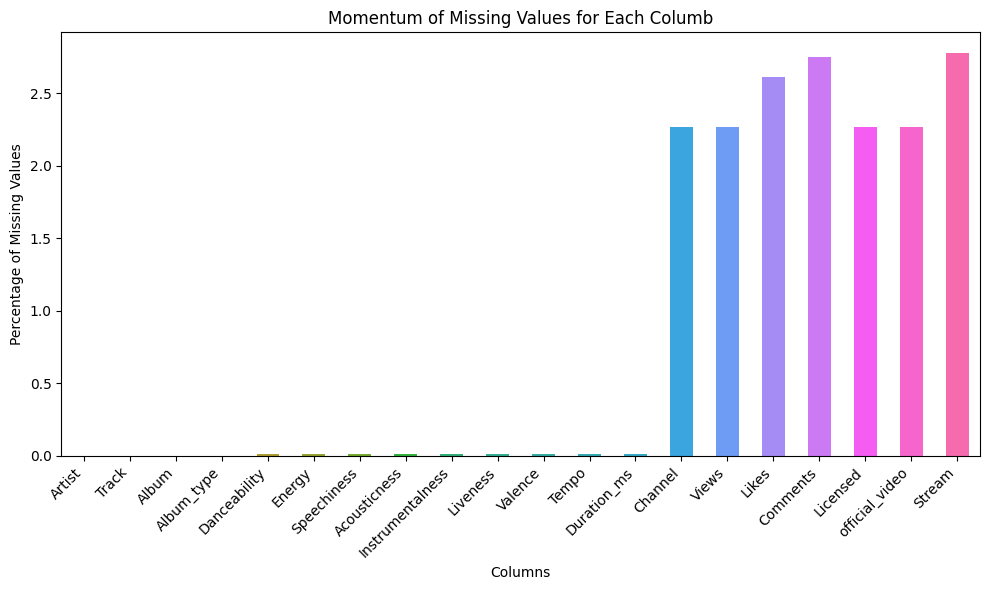

In [170]:
# Define a custom color palette
colors = sns.color_palette('husl', len(missing_values))

# Calculte the momentum of missing values for each column
missing_values_momentum = (df.isnull().sum() / len(df)) * 100

# Create a bar plot with custom colors
plt.figure(figsize=(10,6))
missing_values_momentum.plot(kind='bar', color=colors)
plt.title('Momentum of Missing Values for Each Columb')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation = 45, ha= 'right')
plt.tight_layout()
plt.show()

* Handle nulls by filling in the mean value  
Because Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms have only 2 missing values each

In [171]:
columns_with_few_missing = ['Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

for column in columns_with_few_missing:
    df[column].fillna(df[column].mean(), inplace=True)

* Handle nulls by drop column

In [172]:
columns_with_many_missing = ['Channel', 'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream']

for column in columns_with_many_missing:
    df.dropna(subset=[column], inplace = True)

* Dataset after handling nulls

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19550 entries, 0 to 20717
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19550 non-null  object 
 1   Track             19550 non-null  object 
 2   Album             19550 non-null  object 
 3   Album_type        19550 non-null  object 
 4   Danceability      19549 non-null  float64
 5   Energy            19549 non-null  float64
 6   Speechiness       19550 non-null  float64
 7   Acousticness      19550 non-null  float64
 8   Instrumentalness  19550 non-null  float64
 9   Liveness          19550 non-null  float64
 10  Valence           19550 non-null  float64
 11  Tempo             19550 non-null  float64
 12  Duration_ms       19550 non-null  float64
 13  Channel           19550 non-null  object 
 14  Views             19550 non-null  float64
 15  Likes             19550 non-null  float64
 16  Comments          19550 non-null  float64
 17

In [174]:
# Show Num of Missing values in each column
print(df.isna().sum())

Artist              0
Track               0
Album               0
Album_type          0
Danceability        1
Energy              1
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64


In [175]:
# Set comma display for float numbers
pd.options.display.float_format = '{:,.2f}'.format

In [176]:
# Select only the numerical columns for descriptive statistics
numerical_columns = df.select_dtypes(include=['float64'])
numerical_des = numerical_columns.describe()
print(numerical_des)

       Danceability    Energy  Speechiness  Acousticness  Instrumentalness  \
count     19,549.00 19,549.00    19,550.00     19,550.00         19,550.00   
mean           0.62      0.64         0.10          0.29              0.06   
std            0.17      0.21         0.11          0.29              0.19   
min            0.00      0.00         0.00          0.00              0.00   
25%            0.52      0.51         0.04          0.04              0.00   
50%            0.64      0.67         0.05          0.19              0.00   
75%            0.74      0.80         0.10          0.47              0.00   
max            0.97      1.00         0.96          1.00              1.00   

       Liveness   Valence     Tempo  Duration_ms            Views  \
count 19,550.00 19,550.00 19,550.00    19,550.00        19,550.00   
mean       0.19      0.53    120.61   224,628.13    95,452,488.77   
std        0.17      0.25     29.62   126,909.31   277,567,847.56   
min        0.01      

> Exploring Album type

In [177]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

Album_type
album          14149
single          4689
compilation      712
Name: count, dtype: int64


> Pie chart

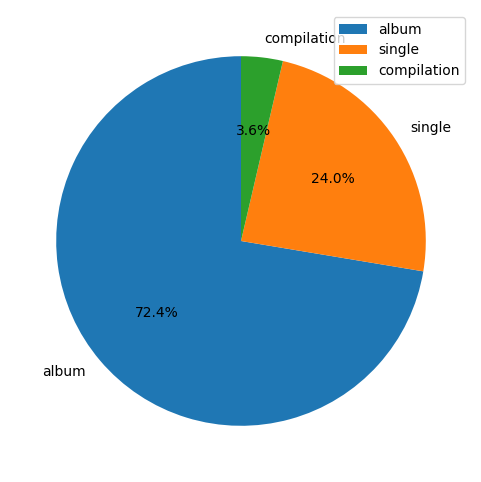

In [178]:
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()

plt.figure(figsize=(15,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.legend(labels, loc='best')

plt.show()

> From the above pie chart, we can make the following conclusions:
* Nhận xét

> Analyzing songs by artist and stream - spotify, views - youtube

In [179]:
# Group the songs by artist and stream - spotify, views - youtube
artist_group = df.groupby('Artist')[['Stream','Views']].sum()

# Sort the artists by the sum of streams and views in descending order
artist_sort = artist_group.sort_values(['Stream', 'Views'], ascending=False)

# Get the top 10 Artist with the most number of streams on Spotify and views on Youtube
top_10_artist = artist_sort.head(10)

top_10_artist

,Stream,Views
Artist,,
Post Malone,"15,251,263,853.00","6,394,420,209.00"
Ed Sheeran,"14,394,881,557.00","15,460,207,769.00"
Dua Lipa,"13,408,076,274.00","8,216,339,307.00"
The Weeknd,"12,464,283,476.00","6,859,509,344.00"
Justin Bieber,"12,097,767,422.00","10,991,060,236.00"
XXXTENTACION,"12,011,910,355.00","2,542,795,388.00"
Imagine Dragons,"11,858,310,928.00","9,093,785,238.00"
Coldplay,"11,778,478,236.00","9,997,277,884.00"
Khalid,"11,386,839,915.00","5,398,246,275.00"


In [180]:
# Create dataframes for streams and views
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]

display(df_streams)
display(df_views)

Artist
Post Malone       15,251,263,853.00
Ed Sheeran        14,394,881,557.00
Dua Lipa          13,408,076,274.00
The Weeknd        12,464,283,476.00
Justin Bieber     12,097,767,422.00
XXXTENTACION      12,011,910,355.00
Imagine Dragons   11,858,310,928.00
Coldplay          11,778,478,236.00
Khalid            11,386,839,915.00
Bruno Mars        10,897,862,950.00
Name: Stream, dtype: float64

Artist
Ed Sheeran                15,460,207,769.00
CoComelon                 14,601,671,211.00
Katy Perry                13,120,632,075.00
Charlie Puth              12,167,594,191.00
Luis Fonsi                11,628,113,031.00
Justin Bieber             10,991,060,236.00
Daddy Yankee              10,871,926,842.00
Bruno Mars                10,240,919,227.00
Macklemore & Ryan Lewis   10,122,055,560.00
Coldplay                   9,997,277,884.00
Name: Views, dtype: float64

> Bar chart

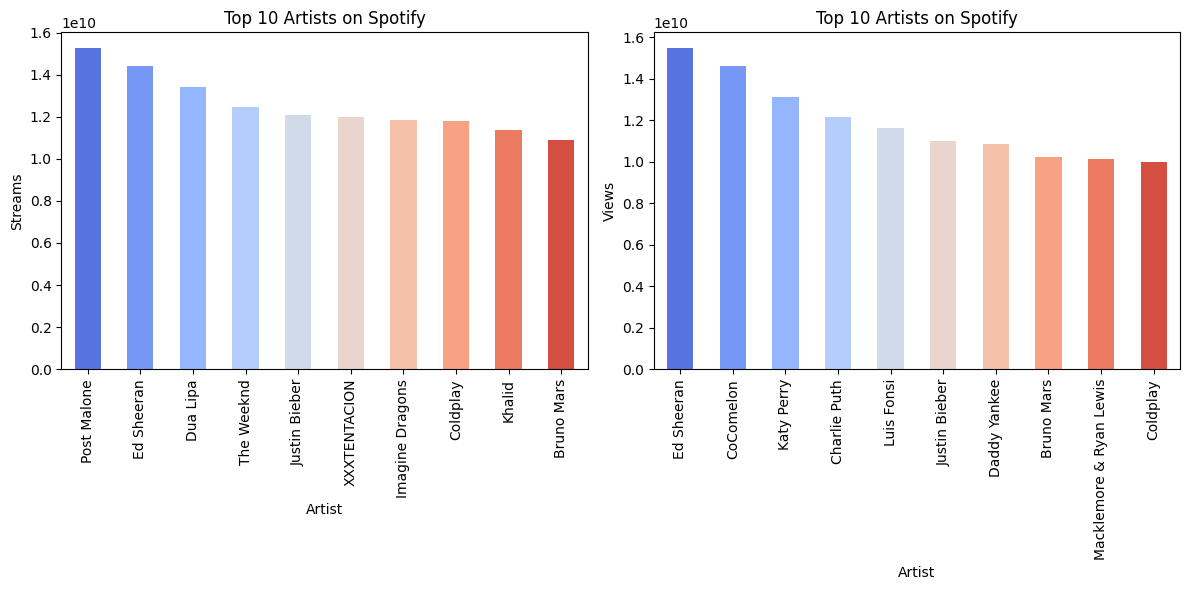

In [181]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create color the columns
colors_streams = sns.color_palette('coolwarm', len(df_streams))
colors_views = sns.color_palette('coolwarm', len(df_views))

# Top 10 streams on Spotify
ax1.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax1, color=colors_streams)
ax1.set_xlabel('Artist')
ax1.set_ylabel('Streams')

# Top 10 views on Youtube
ax2.set_title('Top 10 Artists on Spotify')
df_views.plot(kind='bar', ax=ax2, color=colors_views)
ax2.set_xlabel('Artist')
ax2.set_ylabel('Views')

fig.tight_layout()
plt.show()


> Nhận xét...

> Analyzing Top 10 songs on the basis views, comments and likes

* Because there are many songs with many artists singing in the dataframe, we create another dataframe to analyze views, comments and likes.

In [182]:
# Drop column 'Artist'
df_tracks = df.drop('Artist', axis=1)

# Remove duplicate rows base on column 'Track'
df_tracks = df_tracks.drop_duplicates(subset=['Track'])

df_tracks.head(5)

,Track,Album,Album_type,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Feel Good Inc.,Demon Days,album,0.82,0.70,0.18,0.01,0.00,0.61,0.77,138.56,"222,640.00",Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",True,True,"1,040,234,854.00"
1,Rhinestone Eyes,Plastic Beach,album,0.68,0.70,0.03,0.09,0.00,0.05,0.85,92.76,"200,173.00",Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",True,True,"310,083,733.00"
2,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.69,0.92,0.05,0.04,0.05,0.12,0.55,108.01,"215,150.00",Gorillaz,"8,435,055.00","282,142.00","7,399.00",True,True,"63,063,467.00"
3,On Melancholy Hill,Plastic Beach,album,0.69,0.74,0.03,0.00,0.51,0.06,0.58,120.42,"233,867.00",Gorillaz,"211,754,952.00","1,788,577.00","55,229.00",True,True,"434,663,559.00"
4,Clint Eastwood,Gorillaz,album,0.66,0.69,0.17,0.03,0.00,0.07,0.53,167.95,"340,920.00",Gorillaz,"618,480,958.00","6,197,318.00","155,930.00",True,True,"617,259,738.00"


In [183]:
# Top 10 songs based on views
top_10_song_by_views = df_tracks.nlargest(10, 'Views')

# Top 10 songs based on comments
top_10_song_by_comments = df_tracks.nlargest(10, 'Comments')

# Top 10 songs based on likes
top_10_song_by_likes = df_tracks.nlargest(10, 'Likes')

# display(top_10_song_by_views)
# display(top_10_song_by_comments)
# display(top_10_song_by_likes)

> Horizontal bar chart

<Figure size 1200x600 with 0 Axes>

c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:

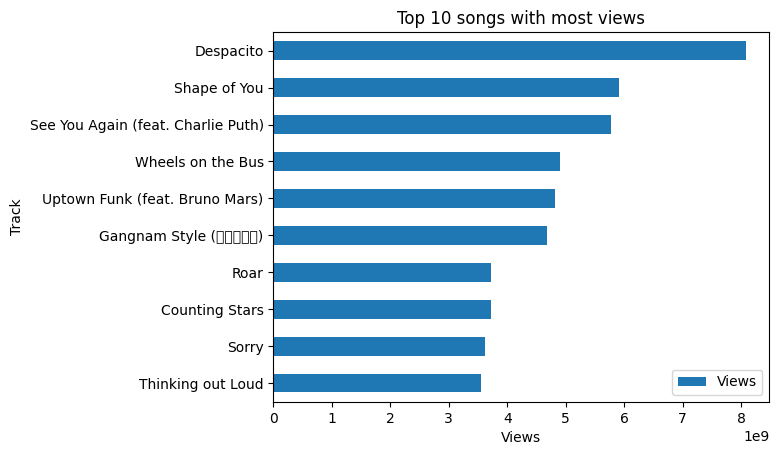

In [184]:
plt.figure(figsize=(12, 6))
top_10_song_by_views.sort_values(by='Views', ascending=True).plot(kind='barh', x='Track', y='Views', title='Top 10 songs with most views')
plt.xlabel('Views')
plt.ylabel('Track')
plt.show()

<Figure size 1200x600 with 0 Axes>

c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:

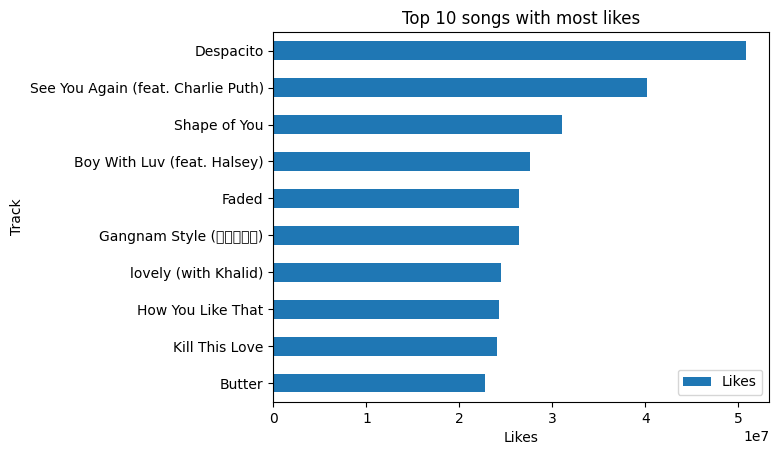

In [185]:
plt.figure(figsize=(12, 6))
top_10_song_by_likes.sort_values(by='Likes', ascending=True).plot(kind='barh', x='Track', y='Likes', title='Top 10 songs with most likes')
plt.xlabel('Likes')
plt.ylabel('Track')
plt.show()

<Figure size 1200x600 with 0 Axes>

c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:

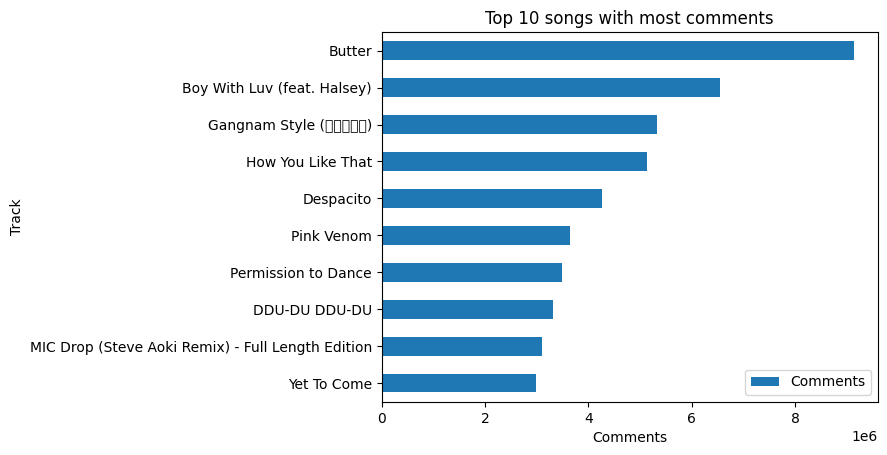

In [186]:
plt.figure(figsize=(12, 6))
top_10_song_by_comments.sort_values(by='Comments', ascending=True).plot(kind='barh', x='Track', y='Comments', title='Top 10 songs with most comments')
plt.xlabel('Comments')
plt.ylabel('Track')
plt.show()

* Nhận xét

> Analyzing songs on the basis the Energy and Danceability

In [188]:
top_songs = df.sort_values('Stream', ascending=False).head(10)

top_songs[['Track', 'Energy', 'Danceability', 'Acousticness']]


,Track,Energy,Danceability,Acousticness
15250,Blinding Lights,0.73,0.51,0.00
12452,Shape of You,0.65,0.82,0.58
19186,Someone You Loved,0.41,0.50,0.75
17937,rockstar (feat. 21 Savage),0.52,0.58,0.12
17938,Sunflower - Spider-Man: Into the Spider-Verse,0.52,0.76,0.53
17445,Sunflower - Spider-Man: Into the Spider-Verse,0.52,0.76,0.53
13503,One Dance,0.62,0.79,0.01
16028,Closer,0.52,0.75,0.41
16099,Closer,0.52,0.75,0.41
14030,Believer,0.78,0.78,0.06


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


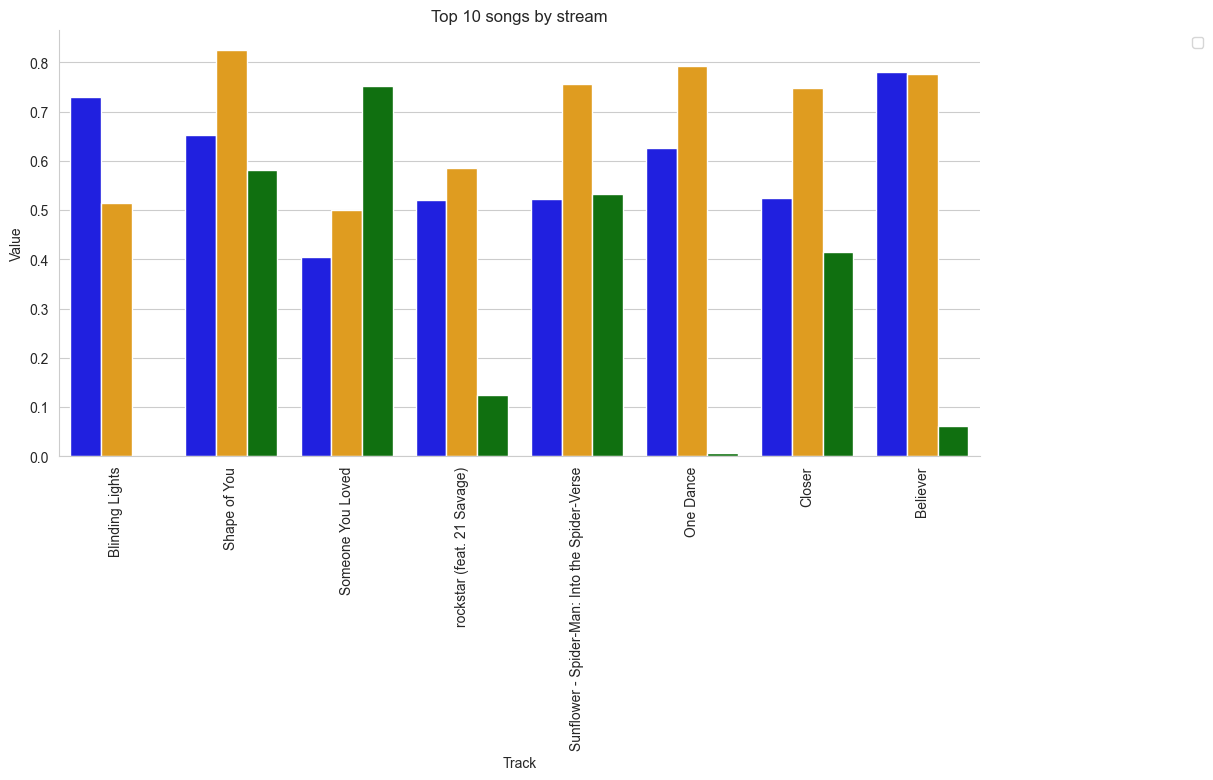

In [193]:
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'], var_name='Attribute', value_name='Value')
sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
            palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'},
            aspect=2, legend=False)

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Top 10 songs by stream')
plt.xlabel('Track')
plt.ylabel('Value')
plt.xticks(rotation = 90)

plt.show()

* Nhận xét

> Determining the top 10 artists on the Spotify platform whose songs have more likes

In [195]:
# Making the column 'Artist' as the index
df_artist = df.set_index('Artist')
df_artist = df_artist[['Danceability', 'Views', 'Likes', 'Album_type']]

df_artist.head(5)

,Danceability,Views,Likes,Album_type
Artist,,,,
Gorillaz,0.82,"693,555,221.00","6,220,896.00",album
Gorillaz,0.68,"72,011,645.00","1,079,128.00",album
Gorillaz,0.69,"8,435,055.00","282,142.00",single
Gorillaz,0.69,"211,754,952.00","1,788,577.00",album
Gorillaz,0.66,"618,480,958.00","6,197,318.00",album


In [197]:
# Group the data by artist, calculate the mean likes
df_artist_like_group = df_artist.groupby('Artist')['Likes'].sum().reset_index()

# Sort by danceability score in descending order
df_artist_like_group_sort = df_artist_like_group.sort_values(by='Likes', ascending=False)

# Top 10 with the most danceability score
top_10_artist_by_like = df_artist_like_group_sort.head(10)

top_10_artist_by_like

,Artist,Likes
151,BTS,"139,403,808.00"
149,BLACKPINK,"132,302,505.00"
329,Charlie Puth,"86,336,925.00"
516,Ed Sheeran,"83,543,319.00"
908,Justin Bieber,"78,584,348.00"
199,Billie Eilish,"73,338,537.00"
764,Imagine Dragons,"72,274,477.00"
59,Alan Walker,"67,977,702.00"
411,DJ Snake,"67,775,831.00"
1129,Luis Fonsi,"66,908,489.00"


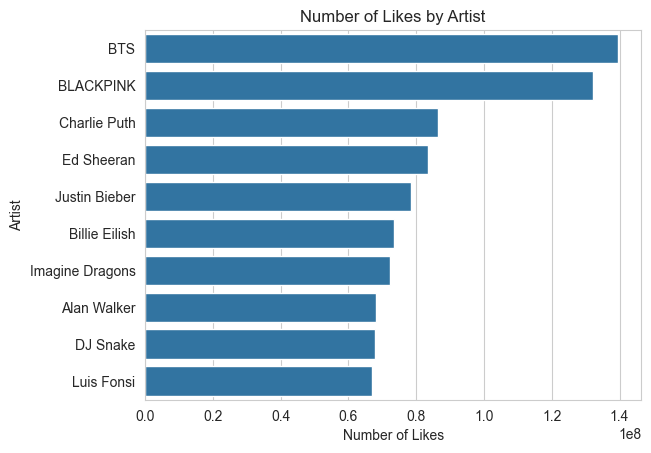

In [198]:
# Data Visualization 
sns.barplot(x='Likes', y ='Artist', data=top_10_artist_by_like)
plt.xlabel('Number of Likes')
plt.ylabel('Artist')
plt.title('Number of Likes by Artist')

plt.show()

* Nhận xét

> Identifying the top channels based on views

In [201]:
df_channels = df.groupby('Channel')['Views'].sum().reset_index()

df_channels_sort = df_channels.sort_values('Views', ascending=False).head(10)

df_channels_sort

,Channel,Views
4748,T-Series,"47,798,638,201.00"
2999,LuisFonsiVEVO,"21,702,521,043.00"
799,CalvinHarrisVEVO,"18,281,142,527.00"
3120,Macklemore,"17,003,410,965.00"
1441,Ed Sheeran,"16,918,224,412.00"
2021,Hear This Music,"15,088,505,405.00"
987,Cocomelon - Nursery Rhymes,"14,601,671,211.00"
717,Bruno Mars,"13,013,566,838.00"
2576,KatyPerryVEVO,"12,476,802,428.00"
1129,DJSnakeVEVO,"12,455,097,762.00"


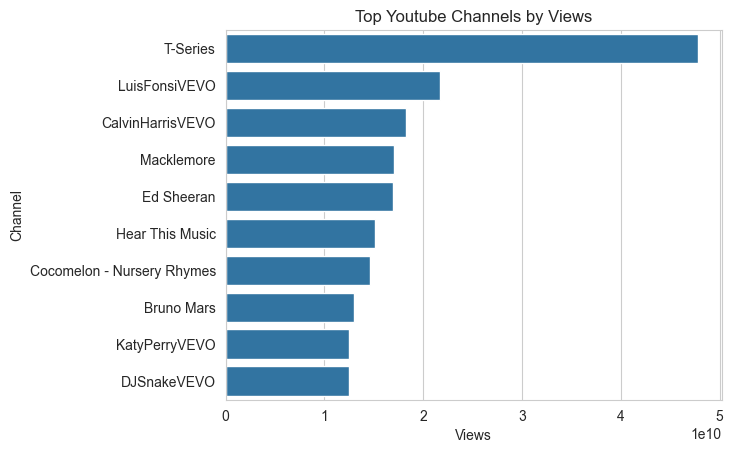

In [202]:
sns.barplot(x='Views', y='Channel', data=df_channels_sort)
plt.xlabel('Views')
plt.ylabel('Channel')
plt.title('Top Youtube Channels by Views')

plt.show()

* Nhận xét